# TUGAS

Mata Kuliah: Machine Learning

Topik: Sampling dan Exploratory Data Analysis (EDA)

Dataset: Iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

sns.set(style="whitegrid")

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].map(dict(zip(range(3), iris.target_names)))

# BAGIAN A


### Informasi Dataset

In [34]:
print("Jumlah data:", df.shape[0])
print("Jumlah variabel:", df.shape[1])
print("\nTipe Data:\n", df.dtypes)
print("\nJumlah spesies:\n", df["species"].value_counts())

Jumlah data: 150
Jumlah variabel: 5

Tipe Data:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Jumlah spesies:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### Statistik Deskriptif

In [36]:
df.describe().T[["mean","std","min","max"]].assign(
    median=df.median(numeric_only=True)
)

,mean,std,min,max,median
sepal length (cm),5.843333,0.828066,4.3,7.9,5.80
sepal width (cm),3.057333,0.435866,2.0,4.4,3.00
petal length (cm),3.758000,1.765298,1.0,6.9,4.35
petal width (cm),1.199333,0.762238,0.1,2.5,1.30


1. Variabel dengan variasi terbesar adalah petal length
2. Variabel dengan variasi terkecil adalah sepal width
3. Petal length dan petal width memiliki penyebaran paling besar dan paling berperan dalam pemisahan spesies.
4. Sepal length dan sepal width relatif lebih stabil dan mendekati distribusi normal.

### Histogram Semua Variabel

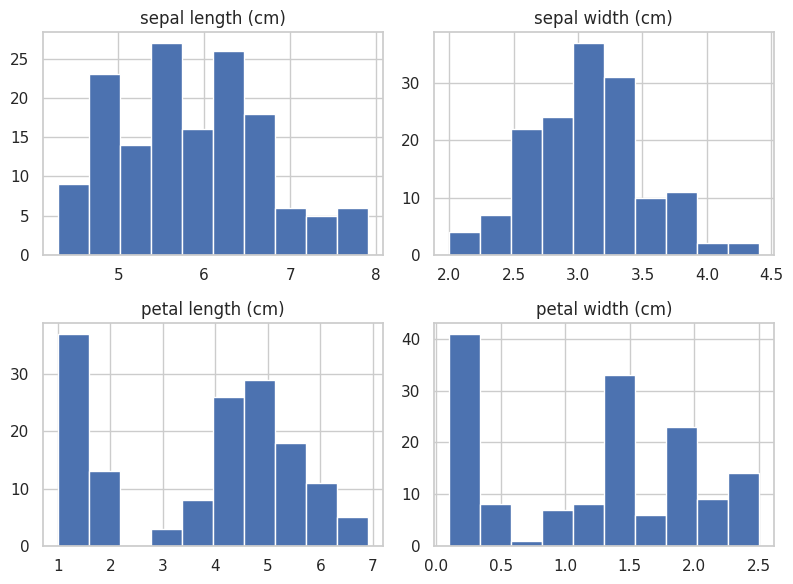

In [38]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

grafik di atas menunjukkan bahwa fitur Petal cenderung lebih berguna dari pada Sepal jika Anda ingin mengklasifikasikan atau membedakan jenis-jenis bunga tersebut, karena pemisahan datanya jauh lebih kontras.

### Boxplot Semua Variabel

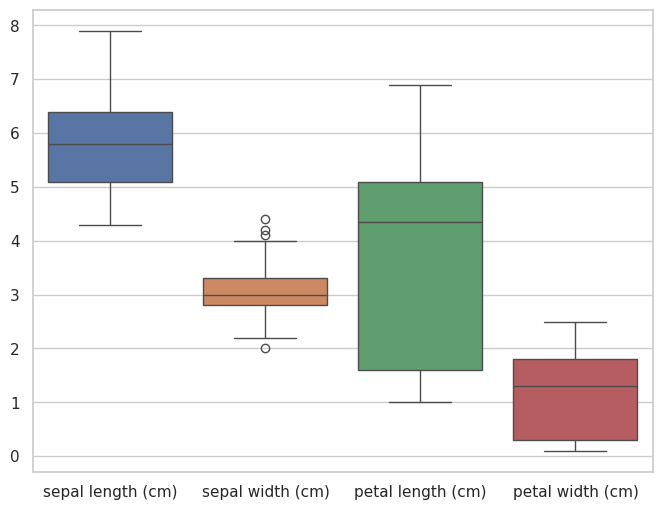

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df.iloc[:,:4])
plt.show()

Sepal length dan sepal width  hasilnya distribusi cenderung normal dengan variasi sedang.
Petal length dan  petal width hasilnya distribusi bimodal, menunjukkan pemisahan spesies yang jelas.
Outlier hanya sedikit terlihat pada sepal width dan tidak signifikan.
Variabel petal memiliki penyebaran paling besar dan paling diskriminatif untuk membedakan spesies.

### Boxplot per Spesies

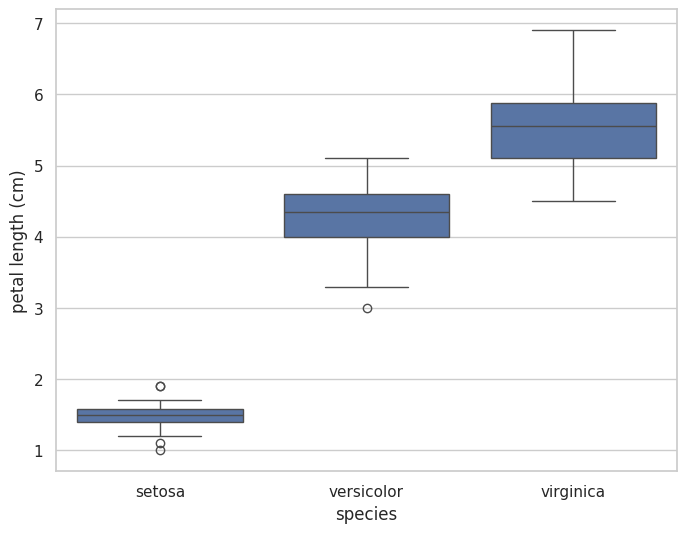

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="petal length (cm)", data=df)
plt.show()

Setosa terpisah sangat jelas dari dua spesies lainnya.
Versicolor dan Virginica memiliki sedikit overlap, tetapi tetap bisa dibedakan dari median dan rentangnya.
Variabel petal length sangat efektif dalam membedakan spesies.

# BAGIAN B

In [15]:
data = df["petal length (cm)"]
mean_asli = data.mean()
print("Mean asli:", mean_asli)

Mean asli: 3.7580000000000005


### Bootstrap Tunggal

In [41]:
sample = np.random.choice(data, size=len(data), replace=True)
print("Mean bootstrap:", sample.mean())
print("Median bootstrap:", np.median(sample))

Mean bootstrap: 3.9080000000000004
Median bootstrap: 4.4


### Bootstrap 100, 1000, 10000

In [43]:
def bootstrap_mean(data, n):
    return [np.mean(np.random.choice(data, len(data), replace=True)) for _ in range(n)]

boot100 = bootstrap_mean(data, 100)
boot1000 = bootstrap_mean(data, 1000)
boot10000 = bootstrap_mean(data, 10000)

### Visualisasi Hasil Bootstrap

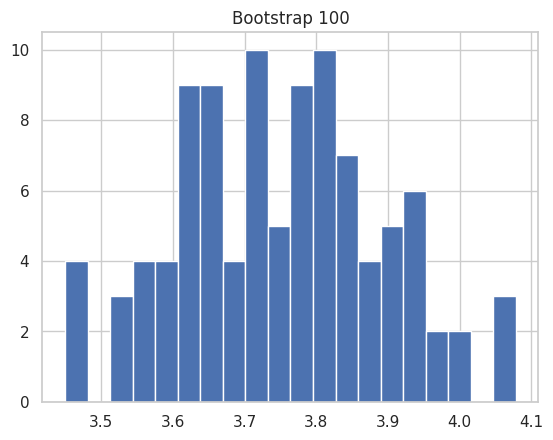

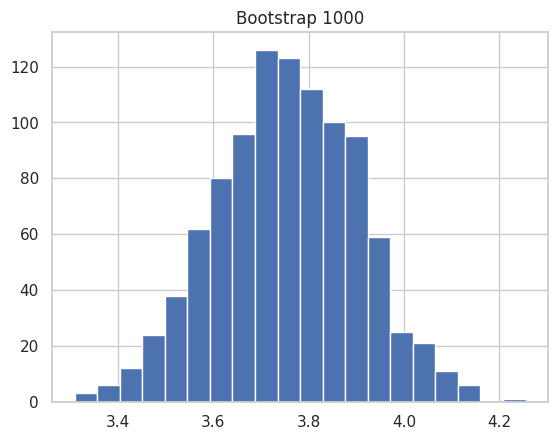

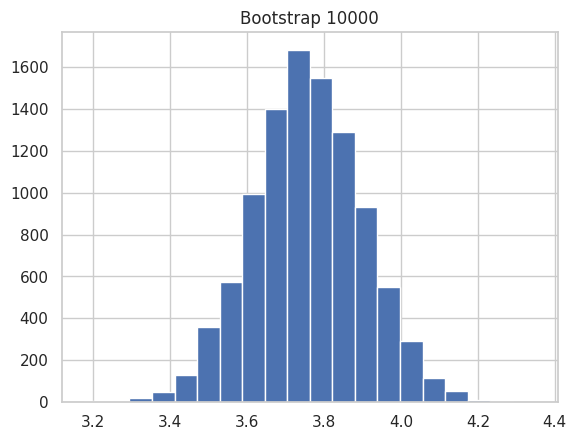

In [44]:
plt.hist(boot100, bins=20)
plt.title("Bootstrap 100")
plt.show()

plt.hist(boot1000, bins=20)
plt.title("Bootstrap 1000")
plt.show()

plt.hist(boot10000, bins=20)
plt.title("Bootstrap 10000")
plt.show()

### Boxplot Perbandingan

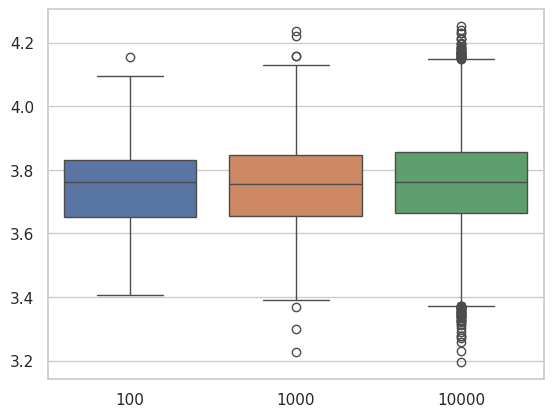

In [19]:
sns.boxplot(data=[boot100, boot1000, boot10000])
plt.xticks([0,1,2],["100","1000","10000"])
plt.show()

Semakin banyak jumlah bootstrap:

1. Interval kepercayaan semakin sempit
2. Estimasi semakin stabil
3. Variansi semakin kecil

Urutan kestabilan:
10000 > 1000 > 100

Namun secara efisiensi komputasi, 1000 bootstrap sudah cukup karena hasilnya hampir sama dengan 10000.

### Interval Kepercayaan 95%

In [25]:
def ci(data):
    return np.percentile(data, [2.5,97.5])

print("CI 100:", ci(boot100))
print("CI 1000:", ci(boot1000))
print("CI 10000:", ci(boot10000))

CI 100: [3.47861667 4.04273333]
CI 1000: [3.47865    4.02868333]
CI 10000: [3.47665    4.03868333]


1. Bootstrap 100 masih cukup baik, tetapi sedikit lebih lebar.
2. Bootstrap 1000 sudah sangat stabil.
3. Bootstrap 10000 tidak memberi perbedaan signifikan dibanding 1000.
4. Jumlah bootstrap yang efisien dan cukup adalah 1000 kali.

# BAGIAN C DAN D

1. Apakah mean bootstrap mendekati mean data asli?

    Mean bootstrap dari 100, 1000, dan 10000 pengulangan menunjukkan nilai yang sangat dekat dengan mean data asli (3.76). Perbedaan hanya terjadi pada angka desimal kecil, sehingga dapat disimpulkan bahwa bootstrap berhasil mengestimasi parameter populasi dengan baik.

2. Apakah mean bootstrap mendekati mean data asli?

    Mean bootstrap dari 100, 1000, dan 10000 pengulangan menunjukkan nilai yang sangat dekat dengan mean data asli (≈ 3.76). Perbedaan hanya terjadi pada angka desimal kecil, sehingga dapat disimpulkan bahwa bootstrap berhasil mengestimasi parameter populasi dengan baik.

3. Mana yang lebih stabil: 100, 1000, atau 10000?

    Bootstrap 10000 adalah yang paling stabil karena memiliki variasi terkecil. Namun, hasil 1000 bootstrap sudah sangat mendekati 10000 dan cukup stabil untuk analisis. Bootstrap 100 masih menunjukkan variasi yang lebih besar.

    Urutan kestabilan:
    10000 > 1000 > 100

    CI 100: [3.47861667 4.04273333]

    CI 1000: [3.47865    4.02868333]
    
    CI 10000: [3.47665    4.03868333]


4. Apakah mean asli berada dalam interval kepercayaan?

    Mean asli berada dalam interval kepercayaan 95% untuk bootstrap 100, 1000, maupun 10000. Menunjukkan bahwa estimasi bootstrap konsisten dan dapat dipercaya.

5. Mengapa satu data bisa muncul berkali-kali pada bootstrap?

    Karena bootstrap menggunakan metode sampling dengan pengembalian (with replacement). Setelah suatu data dipilih, data tersebut dikembalikan ke populasi sehingga memiliki kemungkinan untuk terpilih kembali. Oleh karena itu:

    Satu data bisa muncul lebih dari satu kali.

    Beberapa data mungkin tidak terambil sama sekali.

# BAGIAN D

Insight utama dari EDA dataset Iris

Dataset terdiri dari 150 data dengan distribusi seimbang (50 tiap spesies). Variabel petal length dan petal width menunjukkan variasi paling besar dan mampu memisahkan spesies dengan jelas. Tidak ditemukan outlier ekstrem yang signifikan.

Karakteristik tiap spesies (berdasarkan visualisasi)

1. Setosa = Petal paling kecil, distribusi sangat terpisah dari spesies lain, variasi kecil.
2. Versicolor = Ukuran sedang, sedikit overlap dengan Virginica.
3. Virginica = Petal paling panjang dan lebar, variasi lebih besar.

Variabel petal merupakan fitur paling diskriminatif untuk klasifikasi.

Manfaat bootstrap dalam analisis data

1. Mengestimasi distribusi sampling tanpa asumsi distribusi tertentu.
2. Menghitung interval kepercayaan.
3. Mengukur kestabilan parameter (misalnya mean).

Cocok untuk dataset kecil atau distribusi tidak diketahui.

Jumlah bootstrap yang cukup

Berdasarkan hasil analisis:

1. 100 masih kurang stabil.
2. 1000 sudah cukup stabil dan efisien.
3. 10000 sangat stabil tetapi secara komputasi lebih berat.

Jumlah bootstrap yang cukup dan direkomendasikan adalah 1000 kali, karena sudah memberikan hasil stabil dengan efisiensi yang baik.